# Work with text-data and sklearn

## About DataSet

LINK to UCI — [LINK](https://archive.ics.uci.edu/ml/datasets/SMS+Spam+Collection#)

## Imports

In [1]:
import pandas as pd
import numpy as np
import mglearn

import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer, TfidfTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import LatentDirichletAllocation

## Warnings

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Data splittings

In [3]:
sms = pd.read_csv('SMSSpamCollection.csv', sep='\t', header=None, names=['target', 'text'])
X = sms.text
Y = sms.target

Y[Y == 'spam'] = 1
Y[Y == 'ham'] = 0
Y = Y.astype('int')

## Unique counts of classes: spam & non-spam

In [4]:
Y_np = np.array(Y.values)
uni, cou = np.unique(Y_np, return_counts=True)

print('Unique values:\t\t{} and {}\n'.format(uni[0], uni[1]))
print('Counts:\nSPAM:\t\t\t{}\nnon_SPAM:\t\t{}\n'.format(cou[0], cou[1]))
print('Dummy predict is\t{:.2f}%'.format(100*cou[0]/(cou[0]+cou[1])))

Unique values:		0 and 1

Counts:
SPAM:			4825
non_SPAM:		747

Dummy predict is	86.59%


## Separating

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=42)

## Clean CountVectorizer

In [6]:
vect = CountVectorizer()
vect.fit(X_train)
fnames = vect.get_feature_names()

print('Count of values:\n{}'.format(len(fnames)), end='\n\n')
print('First ten values of fnames:\n{}'.format(fnames[:10]), end='\n\n')
print('Values between 2000 and 2010:\n{}'.format(fnames[2000:2010]), end='\n\n')
print('Every 10th values:\n{}'.format(fnames[::100]), end='\n\n')

Count of values:
7490

First ten values of fnames:
['00', '000', '000pes', '008704050406', '0089', '0121', '01223585236', '01223585334', '02', '0207']

Values between 2000 and 2010:
['credits', 'creep', 'creepy', 'cres', 'cricket', 'cricketer', 'cried', 'cro1327', 'crore', 'cross']

Every 10th values:
['00', '08712317606', '09061790125', '15541', '2rcv', '4give', '78', '910', 'adore', 'alwys', 'approx', 'aunts', 'batsman', 'biggest', 'bowls', 'bunkers', 'careful', 'cheery', 'cmon', 'cons', 'credits', 'days', 'develop', 'dog', 'durban', 'england', 'excused', 'feeling', 'fm', 'frndz', 'get4an18th', 'grahmbell', 'hanging', 'him', 'hugh', 'includes', 'is', 'jolly', 'kisses', 'ld', 'little', 'lubly', 'marrge', 'messenger', 'moji', 'mutai', 'nhs', 'o2fwd', 'option', 'paranoid', 'phasing', 'pocay', 'prem', 'psychiatrist', 'rayman', 'reltnship', 'ring', 'same', 'sehwag', 'shirt', 'sk3', 'somethin', 'sporadically', 'stressed', 'surf', 'teacher', 'thet', 'together', 'trishul', 'understanding', '

## Transforming Data

In [7]:
Xv_train = vect.transform(X_train)
Xv_test = vect.transform(X_test)

## LogReg & cross_val_score

In [8]:
logreg = LogisticRegression()
scores = cross_val_score(logreg, Xv_train, y_train, cv=5)

print('Scores:\n{}\n\n'.format(scores))
print('Mean score:\t{:.4f}'.format(scores.mean()))

Scores:
[0.9916368  0.98086124 0.965311   0.98802395 0.97365269]


Mean score:	0.9799


## LogReg & GridSearchCV

In [9]:
logreg = LogisticRegression()
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(logreg, param_grid=params, cv=5)
grid.fit(Xv_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### = results

In [10]:
print('Grid best score:\t{:.2f}\n'.format(grid.best_score_))
print('Grig best params:\t{}\n'.format(grid.best_params_))
print('Grig train score:\t{:.2f}\n'.format(grid.score(Xv_train, y_train)))
print('Grig test score:\t{:.2f}\n'.format(grid.score(Xv_test, y_test)))
print('F1 test score:\t\t{:.2f}\n'.format(f1_score(grid.predict(Xv_test), y_test)))

Grid best score:	0.98

Grig best params:	{'C': 1000}

Grig train score:	1.00

Grig test score:	0.99

F1 test score:		0.95



## min_df = 11

In [11]:
vect = CountVectorizer(min_df=11)
vect.fit(X_train)
fnames = vect.get_feature_names()

print('Count of values:\n{}'.format(len(fnames)), end='\n\n')
print('First ten values of fnames:\n{}'.format(fnames[:10]), end='\n\n')
print('Values between 2000 and 2010:\n{}'.format(fnames[2000:2010]), end='\n\n')
print('Every 10th values:\n{}'.format(fnames[::100]), end='\n\n')

Count of values:
754

First ten values of fnames:
['000', '08000839402', '08000930705', '10', '100', '1000', '10p', '11', '12hrs', '150']

Values between 2000 and 2010:
[]

Every 10th values:
['000', 'boy', 'easy', 'here', 'mind', 'pounds', 'tell', 'were']



## Transforming Data

In [12]:
Xv_train = vect.transform(X_train)
Xv_test = vect.transform(X_test)

## LogReg & GridSearchCV

In [13]:
logreg = LogisticRegression()### = results
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(logreg, param_grid=params, cv=5)
grid.fit(Xv_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### = results

In [14]:
print('Grid best score:\t{:.2f}\n'.format(grid.best_score_))
print('Grig best params:\t{}\n'.format(grid.best_params_))
print('Grig train score:\t{:.2f}\n'.format(grid.score(Xv_train, y_train)))
print('Grig test score:\t{:.2f}\n'.format(grid.score(Xv_test, y_test)))
print('F1 test score:\t\t{:.2f}\n'.format(f1_score(grid.predict(Xv_test), y_test)))

Grid best score:	0.98

Grig best params:	{'C': 10}

Grig train score:	1.00

Grig test score:	0.99

F1 test score:		0.94



## Add stop_words

In [15]:
vect = CountVectorizer(min_df=11, stop_words='english')
vect.fit(X_train)
fnames = vect.get_feature_names()

print('Count of values:\n{}'.format(len(fnames)), end='\n\n')
print('First ten values of fnames:\n{}'.format(fnames[:10]), end='\n\n')
print('Values between 2000 and 2010:\n{}'.format(fnames[2000:2010]), end='\n\n')
print('Every 10th values:\n{}'.format(fnames[::100]), end='\n\n')

Count of values:
587

First ten values of fnames:
['000', '08000839402', '08000930705', '10', '100', '1000', '10p', '11', '12hrs', '150']

Values between 2000 and 2010:
[]

Every 10th values:
['000', 'chikku', 'girl', 'loving', 'problem', 'told']



## LogReg & GridSearchCV

In [16]:
logreg = LogisticRegression()
params = {'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(logreg, param_grid=params, cv=5)
grid.fit(Xv_train, y_train)## LogReg & GridSearchCV

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### = results

In [17]:
print('Grid best score:\t{:.2f}\n'.format(grid.best_score_))
print('Grig best params:\t{}\n'.format(grid.best_params_))
print('Grig train score:\t{:.2f}\n'.format(grid.score(Xv_train, y_train)))
print('Grig test score:\t{:.2f}\n'.format(grid.score(Xv_test, y_test)))
print('F1 test sco### = resultsre:\t\t{:.2f}\n'.format(f1_score(grid.predict(Xv_test), y_test)))

Grid best score:	0.98

Grig best params:	{'C': 10}

Grig train score:	1.00

Grig test score:	0.99

F1 test sco### = resultsre:		0.94



## Pipe

In [18]:
pipe = make_pipeline(TfidfVectorizer(min_df=5, norm=None), 
                     LogisticRegression())

params = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]}

grid = GridSearchCV(pipe, params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### = results

In [19]:
print('Grid best score:\t{:.2f}\n'.format(grid.best_score_))
print('Grig best params:\t{}\n'.format(grid.best_params_))
print('Grig train score:\t{:.2f}\n### = results'.format(grid.score(X_train, y_train)))
print('Grig test score:\t{:.2f}\n'.format(grid.score(X_test, y_test)))
print('F1 test score:\t\t{:.2f}\n'.format(f1_score(grid.predict(X_test), y_test)))

Grid best score:	0.98

Grig best params:	{'logisticregression__C': 0.1}

Grig train score:	1.00
### = results
Grig test score:	0.99

F1 test score:		0.96



### check step

In [20]:
grid.best_estimator_.named_steps['tfidfvectorizer']

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm=None, preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

## TFIDF & IDF

In [21]:
vect = grid.best_estimator_.named_steps['tfidfvectorizer']

Xv_train = vect.transform(X_train)
max_value = Xv_train.max(axis=0).toarray().ravel()
sort_tfidf = max_value.argsort()
sort_idf = np.argsort(vect.idf_)

fnames = np.array(vect.get_feature_names())

### = results

In [22]:
print('Low-value tfidf features:\n{}\n\n'.format(fnames[sort_tfidf[:20]]))
print('High-value tfidf features:\n{}\n\n'.format(fnames[sort_tfidf[-20:]]))

print('Low-value idf features:\n{}\n\n'.format(fnames[sort_idf[:20]]))
print('High-value idf features:\n{}\n\n'.format(fnames[sort_idf[-20:]]))

Low-value tfidf features:
['see' 'today' 'take' 'www' 'well' 'yes' 'after' 'tomorrow' 'doing' 'last'
 'won' 'pick' 'why' '150p' 'cant' 'find' 'care' 'lol' 'his' 'down']


High-value tfidf features:
['can' 'should' 'without' 'boy' 'xmas' 'the' 'lose' 'smile' 'you' 'do'
 'simple' 'it' 'my' 'be' 'missing' 'will' 'her' 'face' 'lt' 'gt']


Low-value idf features:
['to' 'you' 'the' 'and' 'in' 'is' 'me' 'for' 'it' 'my' 'your' 'call' 'of'
 'have' 'that' 'on' 'now' 'are' 'not' 'can']


High-value idf features:
['jst' 'married' 'sim' 'directly' 'marry' 'under' 'hl' 'died' 'unsub'
 'hell' 'high' 'medical' 'decide' 'joy' 'meds' 'daily' 'meh' 'shouldn'
 'maximize' 'intro']




### = results plot

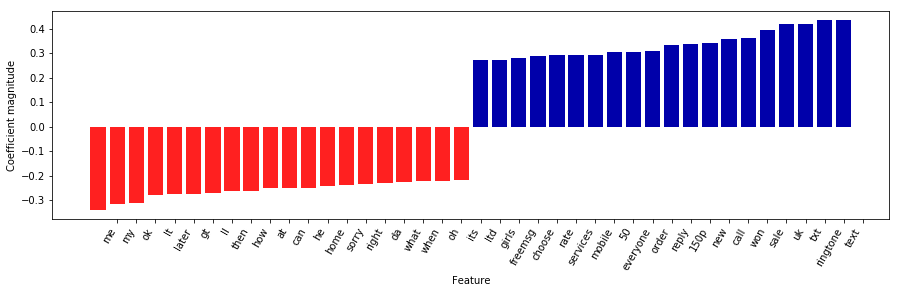

In [23]:
mglearn.tools.visualize_coefficients(grid.best_estimator_.named_steps['logisticregression'].coef_, fnames, n_top_features=20)

## ngram_range=(2,2)

In [24]:
vect = CountVectorizer(ngram_range=(2,2))
vect.fit(X_train)
fnames = vect.get_feature_names()

print('Count of values:\n{}'.format(len(fnames)), end='\n\n')
print('First ten values of fnames:\n{}'.format(fnames[:10]), end='\n\n')
print('Values between 2000 and 2010:\n{}'.format(fnames[2000:2010]), end='\n\n')
print('Every 1000th values:\n{}'.format(fnames[::1000]), end='\n\n')

Count of values:
33653

First ten values of fnames:
['00 in', '00 per', '00 sub', '000 bonus', '000 cash', '000 homeowners', '000 pounds', '000 price', '000 prize', '000 xmas']

Values between 2000 and 2010:
['an insurance', 'an ipod', 'an knackered', 'an o2', 'an offer', 'an official', 'an offline', 'an open', 'an opportunity', 'an outsider']

Every 1000th values:
['00 in', '9ja that', 'an insurance', 'as practice', 'been thinking', 'by broken', 'child who', 'da any', 'doing work', 'exist like', 'free mobile', 'goin on', 'hav blessed', 'home within', 'ing tomorrow', 'just 60p', 'like failing', 'married person', 'monoc monos', 'news by', 'of here', 'or mall', 'player will', 'realy frm', 'see it', 'snake amp', 'stuff or', 'the asus', 'this she', 'told before', 'ur order', 'we start', 'with gpu', 'you excited']



## ngram_range=(1,3)

In [25]:
vect = CountVectorizer(ngram_range=(1,3))
vect.fit(X_train)
fnames = vect.get_feature_names()

print('Count of values:\n{}'.format(len(fnames)), end='\n\n')
print('First ten values of fnames:\n{}'.format(fnames[:10]), end='\n\n')
print('Values between 2000 and 2010:\n{}'.format(fnames[2000:2010]), end='\n\n')
print('Every 100## ngram_range=(2,2)00th values:\n{}'.format(fnames[::10000]), end='\n\n')

Count of values:
83691

First ten values of fnames:
['00', '00 in', '00 in our', '00 per', '00 sub', '00 sub 16', '000', '000 bonus', '000 bonus caller', '000 cash']

Values between 2000 and 2010:
['500 cash or', '500 cd', '500 cd gift', '500 cross', '500 cross ntwk', '500 enter', '500 enter our', '500 free', '500 free net', '500 free text']

Every 100## ngram_range=(2,2)00th values:
['00', 'before getting it', 'dont have the', 'havent reply', 'live on', 'oh and', 'she just broke', 'to 89070', 'work please call']



## Pipe

In [26]:
pipe = make_pipeline(TfidfVectorizer(min_df=5), LogisticRegression())
params = {'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 
          'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]}

In [27]:
grid = GridSearchCV(pipe, param_grid=params, cv=5)
grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise-deprecating',
       estimator=Pipeline(memory=None,
     steps=[('tfidfvectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.float64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=5,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth...penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False))]),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'logisticregression__C': [0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000], 'tfidfvectorizer__ngram_range': [(1, 1), (1, 2), (1, 3)]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

### = results

In [28]:
print('Grid best score:\t{:.2f}\n'.format(grid.best_score_))
print('Grig best params:\t{}\n'.format(grid.best_params_))
print('Grig train score:\t{:.2f}\n'.format(grid.score(X_train, y_train)))
print('Grig test score:\t{:.2f}\n'.format(grid.score(X_test, y_test)))
print('F1 test score:\t\t{:.2f}\n'.format(f1_score(grid.predict(X_test), y_test)))

Grid best score:	0.98

Grig best params:	{'logisticregression__C': 100, 'tfidfvectorizer__ngram_range': (1, 3)}

Grig train score:	1.00

Grig test score:	0.99

F1 test score:		0.96



## Heat Map

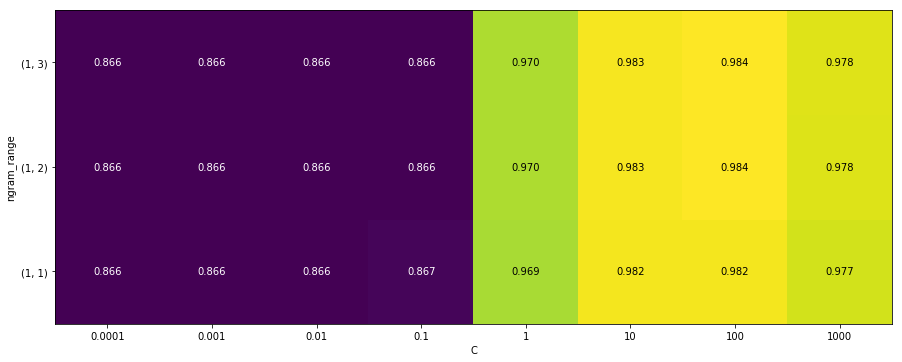

In [29]:
scores = grid.cv_results_['mean_test_score'].reshape(-1, 3).T

plt.figure(figsize=(15,15))
heatmap = mglearn.tools.heatmap(scores, 
                                xlabel="C", 
                                ylabel="ngram_range", 
                                cmap="viridis", 
                                fmt="%.3f", 
                                xticklabels=params['logisticregression__C'], 
                                yticklabels=params['tfidfvectorizer__ngram_range'])

plt.show()

## Topics

In [30]:
vect = CountVectorizer(max_features=10000, max_df=.15)
Xv = vect.fit_transform(X_train)

In [31]:
lda = LatentDirichletAllocation(n_components=10, learning_method='batch', max_iter=25, random_state=42)
topics = lda.fit_transform(Xv)

### = results

In [32]:
sorting = np.argsort(lda.components_, axis=1)[:, ::-1]
feature_names = np.array(vect.get_feature_names())

mglearn.tools.print_topics(topics=range(10), 
                           feature_names=feature_names, 
                           sorting=sorting, 
                           topics_per_chunk=5, 
                           n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
call          lt            free          and           in            
your          gt            txt           just          it            
no            can           or            its           not           
have          it            now           have          but           
for           and           call          is            got           
prize         ll            ur            my            or            
from          in            your          on            we            
claim         where         mobile        it            is            
as            we            text          now           of            
is            be            for           all           with          


topic 5       topic 6       topic 7       topic 8       topic 9       
--------      --------      --------      --------      --------      
ok  

![EBATB](ebatb.gif)